In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
#Loading data
data = pd.read_csv("incidents-securite.csv",sep=';',error_bad_lines=False,encoding='utf8', usecols=['Date','Localisation','ESR','Type'])


In [3]:
data.head(2) #visualisation head data

,Date,Localisation,ESR,Type
0,2017-12-21,CLERMONT-FERRAND,oui,Dérive
1,2018-01-22,HENDAYE,oui,Déraillement


In [4]:
data['Localisation'] = data['Localisation'].apply(lambda x : str(x).lower())
data['Type'] = data['Type'].apply(lambda x : str(x).lower())
data['ESR'] = data['ESR'].apply(lambda x : str(x).lower())

In [5]:
data.head(2)

,Date,Localisation,ESR,Type
0,2017-12-21,clermont-ferrand,oui,dérive
1,2018-01-22,hendaye,oui,déraillement


In [6]:
#Extract frequencies values of the Localisation column >= 5
g=data['Localisation'].value_counts()
localisation_frequencies = [ i for i in g.index  if g[i] >=5]
#Extract indexes data with frequencies values  of the Localisation column  >=5
index_localisation =[]
for i in localisation_frequencies :
        index = data[data['Localisation']==i].index
        for d in index:
                 index_localisation.append(d)
        
#Select the data with frequencies values of the Localisation column  >=5               
data = pd.DataFrame(data.loc[index_localisation])



In [7]:
#Extract frequencies values of the Type column >= 2
v=data['Type'].value_counts()
type_frequencies = [ i for i in v.index  if v[i] >=2]
#Extract indexes data with frequencies values  of the Type column  >=2
index_type =[]
for i in type_frequencies :
        index = data[(data['Type']==i) & (i!= "nan")].index
        for d in index:
                 index_type.append(d)
                
#Select the data with frequencies values of the Type column  >=2                  
data = pd.DataFrame(data.loc[index_type])



frequencies_incidences_of_ security_by_Localisation_incidences


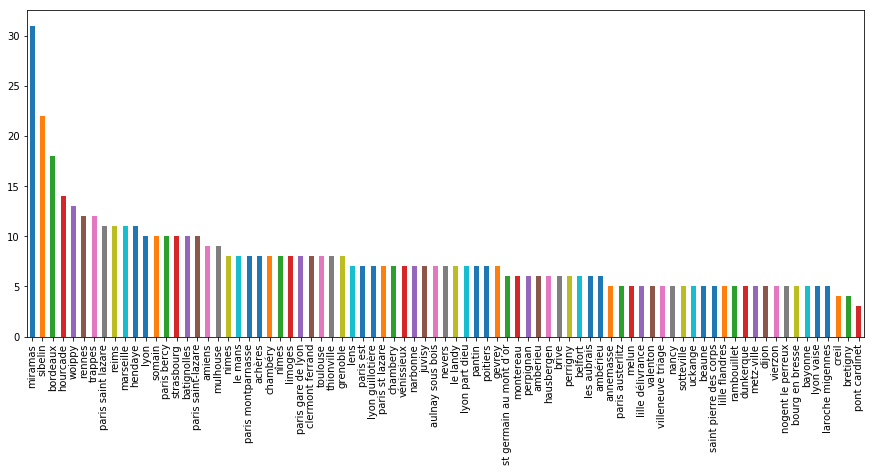

In [8]:

data['Localisation'].value_counts().plot(kind='bar',figsize=(15,6))            
              
print("frequencies_incidences_of_ security_by_Localisation_incidences") 

frequencies_incidences_of_ security_by_type_incidences


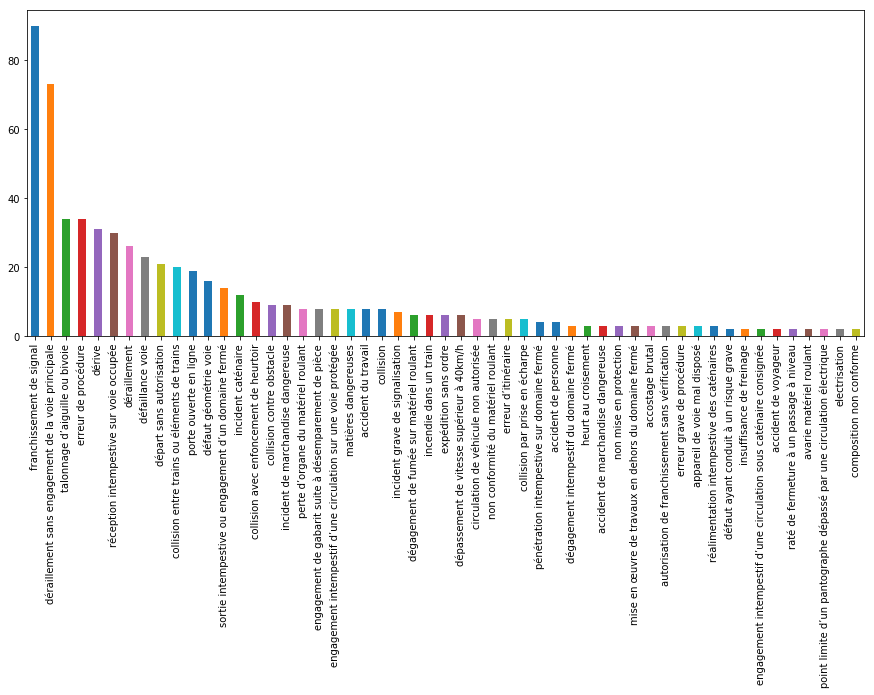

In [9]:

data['Type'].value_counts().plot(kind='bar',figsize=(15,6))            
              
print("frequencies_incidences_of_ security_by_type_incidences") 

Frequencies_incidences_of_ security_by_ESR


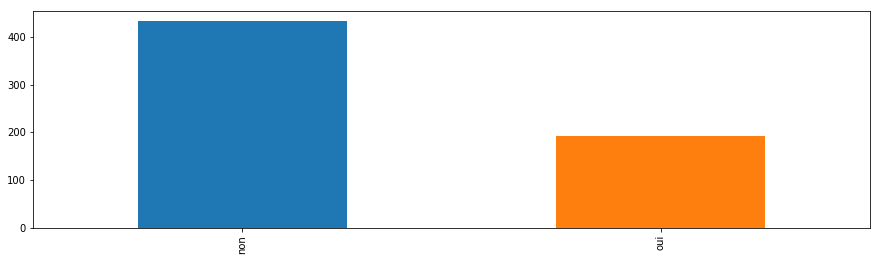

In [10]:
data['ESR'].value_counts().plot(kind='bar',figsize=(15,4))
print("Frequencies_incidences_of_ security_by_ESR")


Frequencies_incidences_of_security_by_months


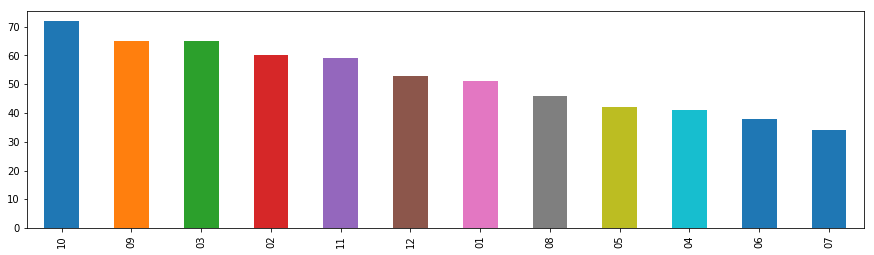

In [11]:
#Extract Date by months
data['Date'] = data['Date'].apply(lambda x: x.split('-')[1]) 
print("Frequencies_incidences_of_security_by_months")
data['Date'].value_counts().plot(kind='bar',figsize=(15,4))

In [12]:
data.shape

(626, 4)

In [13]:
#data coding 
data['ESR'] = data['ESR'].map({'non':0, 'oui':1})
data_coded = pd.get_dummies(data['Type'])
data_coded['Date'] = pd.Series(data['Date'].values, index=data.index)
data_coded['ESR'] = pd.Series(data['ESR'].values, index=data.index)
data_coded['Type'] = pd.Series(data['Type'].values, index=data.index)
data_coded['Localisation'] = pd.Series(data['Localisation'].values, index=data.index)
data_coded.head(5)

,accident de marchandise dangereuse,accident de personne,accident de voyageur,accident du travail,accostage brutal,appareil de voie mal disposé,autorisation de franchissement sans vérification,avarie matériel roulant,circulation de véhicule non autorisée,collision,...,pénétration intempestive sur domaine fermé,raté de fermeture à un passage à niveau,réalimentation intempestive des caténaires,réception intempestive sur voie occupée,sortie intempestive ou engagement d’un domaine fermé,talonnage d’aiguille ou bivoie,Date,ESR,Type,Localisation
368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,1,franchissement de signal,miramas
810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,09,0,franchissement de signal,miramas
1454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,08,1,franchissement de signal,miramas
2114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,07,0,franchissement de signal,miramas
2445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,03,0,franchissement de signal,miramas


In [14]:
data_coded.to_csv("incidences_s.csv", header=True, sep=",",encoding="utf8")

# CLUSTERING KMEAN BY PYSPARK

In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler


In [16]:
spark = SparkSession.builder.master("local").getOrCreate()
df = spark.read.csv("incidences_s.csv",header=True,inferSchema=True,encoding="utf8")
df = df.drop(df["_c0"])


In [17]:
df.toPandas().head(5)

,accident de marchandise dangereuse,accident de personne,accident de voyageur,accident du travail,accostage brutal,appareil de voie mal disposé,autorisation de franchissement sans vérification,avarie matériel roulant,circulation de véhicule non autorisée,collision,...,pénétration intempestive sur domaine fermé,raté de fermeture à un passage à niveau,réalimentation intempestive des caténaires,réception intempestive sur voie occupée,sortie intempestive ou engagement d’un domaine fermé,talonnage d’aiguille ou bivoie,Date,ESR,Type,Localisation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,1,franchissement de signal,miramas
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,franchissement de signal,miramas
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,1,franchissement de signal,miramas
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,franchissement de signal,miramas
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,franchissement de signal,miramas


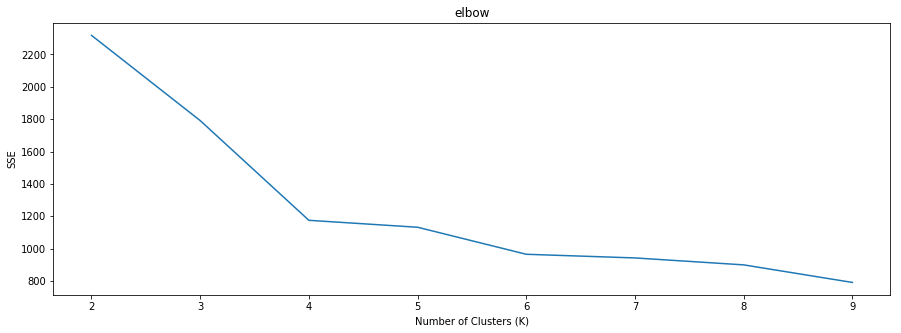

In [18]:
vect_assembler = VectorAssembler(inputCols=df.columns[:-2], outputCol="features")
vect_assembler = vect_assembler.transform(df)
errors=[]
for k in range(2,10):
    kmean = KMeans(k=k,featuresCol="features")
    model = kmean.fit(vect_assembler)
    intra_distance = model.computeCost(vect_assembler)
    errors.append(intra_distance)
cluster_num = range(2,10)
plt.figure(figsize=(15,5))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title("elbow")
plt.plot(cluster_num,errors)
plt.show()

In [26]:

kmean = KMeans(k=4,featuresCol="features",predictionCol="prediction",initMode="random")
model = kmean.fit(vect_assembler)
predictions = model.transform(vect_assembler)
cluster_df = predictions.toPandas().head(2)
cluster_df


,accident de marchandise dangereuse,accident de personne,accident de voyageur,accident du travail,accostage brutal,appareil de voie mal disposé,autorisation de franchissement sans vérification,avarie matériel roulant,circulation de véhicule non autorisée,collision,...,réalimentation intempestive des caténaires,réception intempestive sur voie occupée,sortie intempestive ou engagement d’un domaine fermé,talonnage d’aiguille ou bivoie,Date,ESR,Type,Localisation,features,prediction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,1,franchissement de signal,miramas,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,franchissement de signal,miramas,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


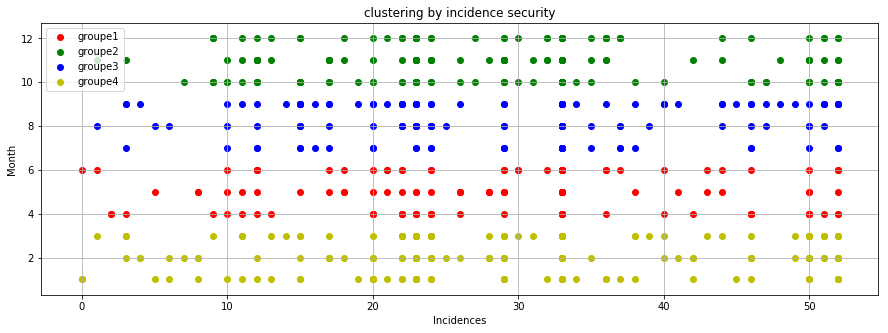

In [20]:


Arrayclusters = predictions.select("Date","Type","Localisation","prediction")
Type = preprocessing.LabelEncoder().fit_transform(list(Arrayclusters.toPandas()['Type'].values))
Loc =  preprocessing.LabelEncoder().fit_transform(list(Arrayclusters.toPandas()['Localisation'].values))
Pred = list(Arrayclusters.toPandas()['prediction'].values)
Dat = list(Arrayclusters.toPandas()['Date'].values)

Clusters = list()
for i in range(len(Pred)):
    Clusters.append([Type[i],Dat[i],Pred[i]])
plt.figure(figsize=(15,5))
plt.grid()

for i in range(len(Clusters)):
    value = Clusters[i]
    prediction=value[2]
    Dat = value[1]
    Types = value[0]
    
    a = plt.scatter(Types[prediction==0],Dat[prediction ==0], marker="o",c="r",label="groupe1")
    b = plt.scatter(Types[prediction==1],Dat[prediction ==1], marker="o",c="g",label="groupe2")
    c= plt.scatter(Types[prediction==2],Dat[prediction ==2], marker="o",c="b",label="groupe3")
    d= plt.scatter(Types[prediction==3],Dat[prediction ==3], marker="o",c="y",label="groupe4")
   # e= plt.scatter(Types[prediction==4],Localisation[prediction ==4], marker="o",c="m",label="groupe5")
   # f= plt.scatter(Types[prediction==5],Localisation[prediction ==5], marker="o",c="c",label="groupe6")
   
    plt.xlabel("Incidences")
    plt.ylabel("Month")
    plt.legend(handles=[a,b,c,d])
    plt.title("clustering by incidence security")
plt.show()

    


In [21]:
predictions.groupby('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  184|
|         3|  176|
|         2|  145|
|         0|  121|
+----------+-----+

